### IML Assignment - House Price Prediction
### Kushal Mullagiri - E22022
### Suparna. S - E22035
### B. Teja - E22038

In [1]:
#Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.chdir(r'C:\Users\ssupa\Desktop\Python Projects\IML\ML Assignment')
data = pd.read_csv('kc_house_train_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


### Experiment 1:  
Going through the attributes in the given kc_housing dataset and creating the initial hypothesis which may change after doing the EDA.

**Initial hypothesis on the Columns:**

**Date:** 
In the US, fiscal year starts on October 1, 2014, and ends on September 30, 2015. We can infer that the highest sales might happen post September in view of the bonuses and beginning of fiscal year.

**Price:**
Average house price in Kings County, Seattle in the  year 2014-2015 was around 0.3M. We can hypothesise whether the houses in the dataset conform to such a figure.

**Bedroom:**
Average family size in USA is around 3; and on an average each person might be having 1 bedroom. So, generally houses might have 3 bedrooms.

**Sqft_living:**
In 2019, the average sqft_living is around 2,301 square feet. We can hypothesise whether sqft_living increase/decrease over the past 5 years.

**Sqft_lot:**
The overall median lot size in the King County area is around 8,400 square feet in 2021.  We can hypothesise whether sqft_living increase/decrease over the past 5 years.

**Waterfront:**
Waterfront houses are highly desirable for their aesthetic and uplifting reasons. Generally, people prefer houses with waterfront and the prices can be high for the same. If the property does not have waterfront, then it is 0 and if otherwise, 1.

**View:**
The view of the property might also conform to higher property prices. Since and index from 0-4, shows how good the view of the property has, we can expect higher index with higher price.

**Condition:**
The better the condition of the house, higher the price for obvious reasons. 

**Grade:**
Houses of better grade would have costed more to build and command higher value. We can expect houses of better grade to have higher price.

**Yr_built:**
Newer the houses, the better the prices(unless renovated).

**Yr_renovated:**
Recently renovated houses might have higher price.

**Zipcode – latitude/longitude:**
Area or locality is an important feature in house price prediction. Houses in a particular locality will form a cohort and command similar pricing.  


### Experiment 2:
Exploring the columns further in our dataset, splitting the date column into year, month and day which will help in identifying the number of years the houses are being sold and dropping the columns id, sqft_living15 and sqft_lot15 as they are not required to proceed with our analysis. 

In [2]:
#Splitting the date column as year, month and day
dateTime=pd.DatetimeIndex(data.date)
data['year']=dateTime.year
data['month']=dateTime.month
data['day']=dateTime.day
data.drop(columns=['date'],inplace=True)
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [3]:
#Grouping months according to years
data.groupby(["year"])["month"].value_counts()

year  month
2014  7        1004
      6         991
      8         872
      10        871
      9         846
      5         777
      12        668
      11        645
2015  4        1004
      3         825
      2         540
      1         415
      5         303
Name: month, dtype: int64

In [4]:
#Exploring the columns
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [6]:
#Dropping the id, sqft_living15 and sqft_lot15 columns
data = data.drop(['id', 'sqft_living15', 'sqft_lot15'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,year,month,day
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,2014,12,9
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,2014,5,12
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,2014,5,27
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,2014,5,28
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,2014,10,7


### Experiment 3:
Doing the univariate analysis on the columns of the dataset to understand each attributes better

In [7]:
#Identifying the feasible features from the dataset
#Numerical and Continuous
numerical = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','zipcode','lat','long']

#Categorical and Discrete
categorical = ['year','month','day','bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade','yr_built']

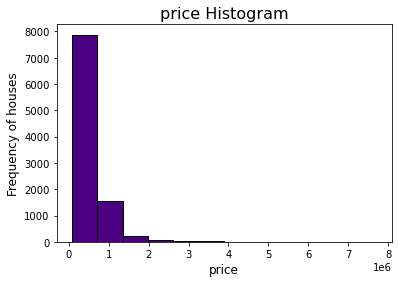

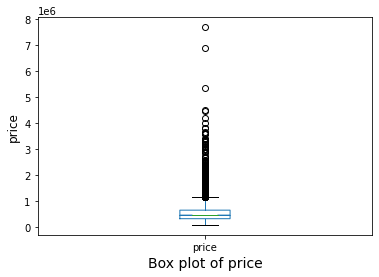

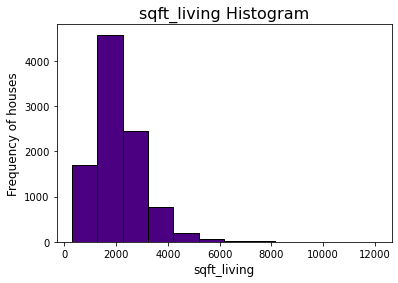

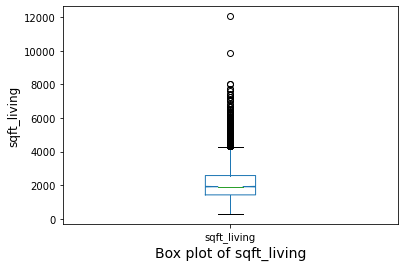

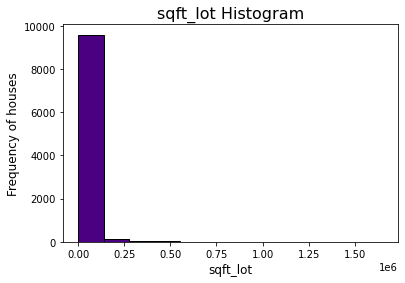

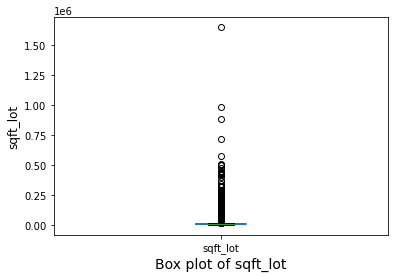

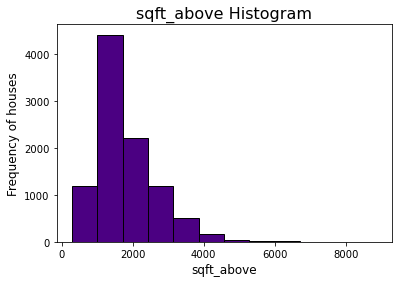

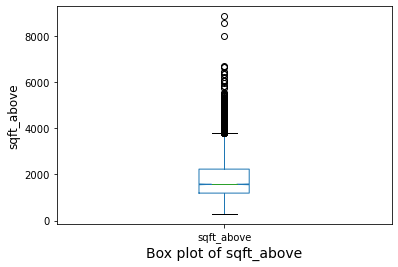

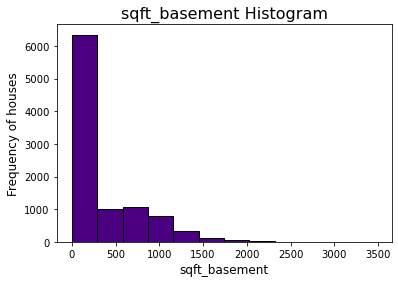

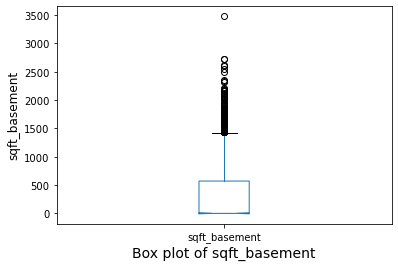

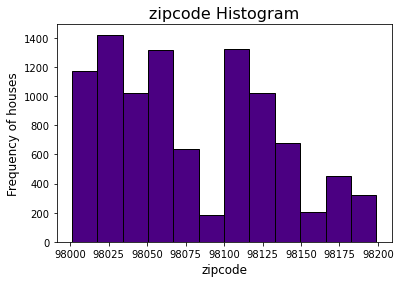

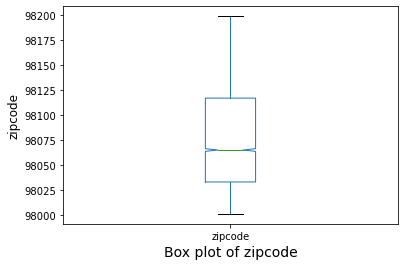

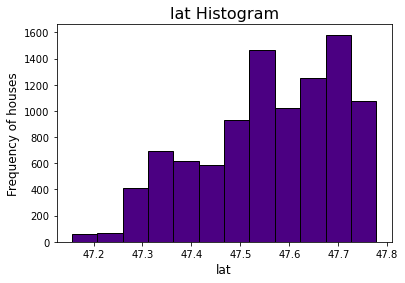

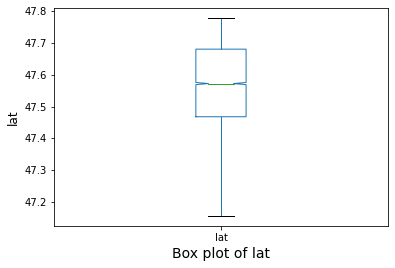

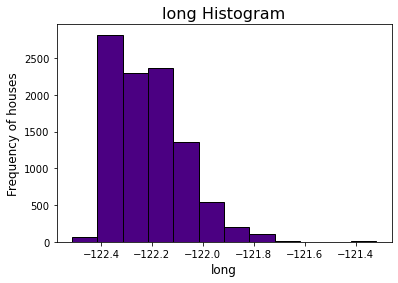

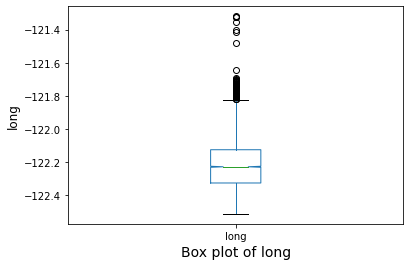

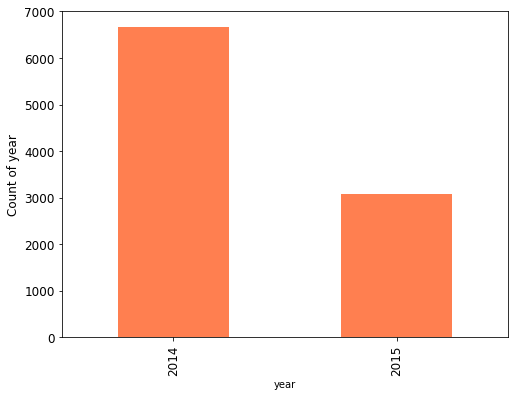

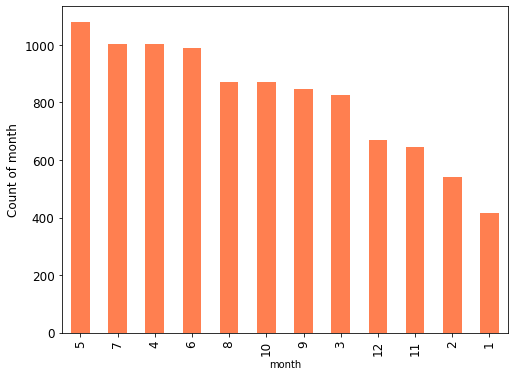

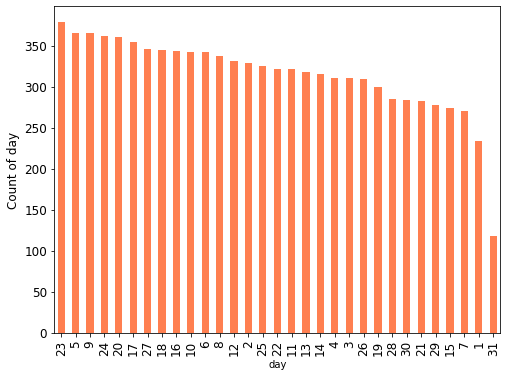

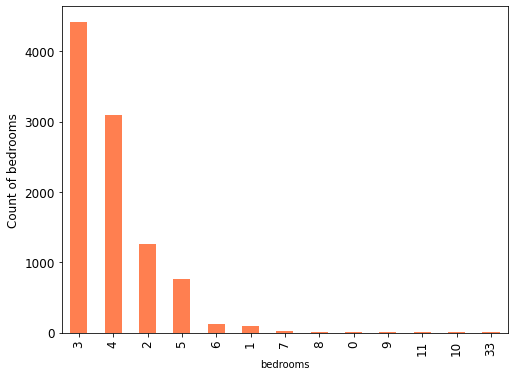

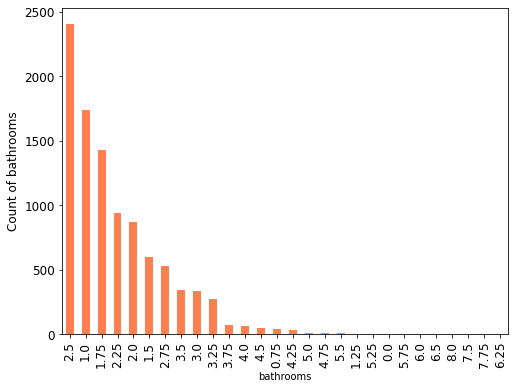

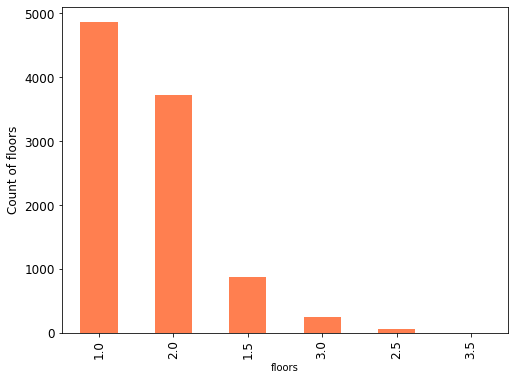

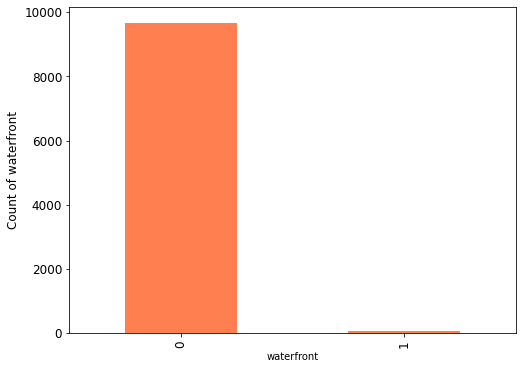

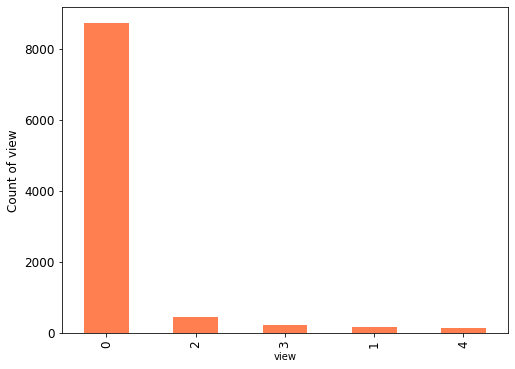

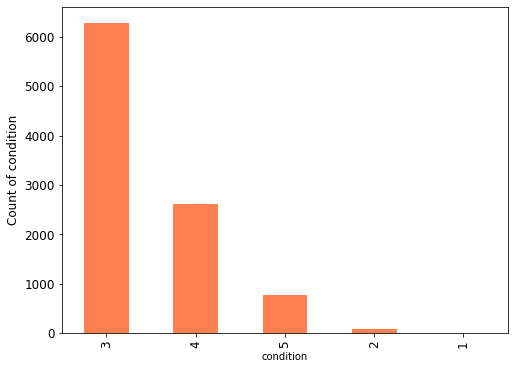

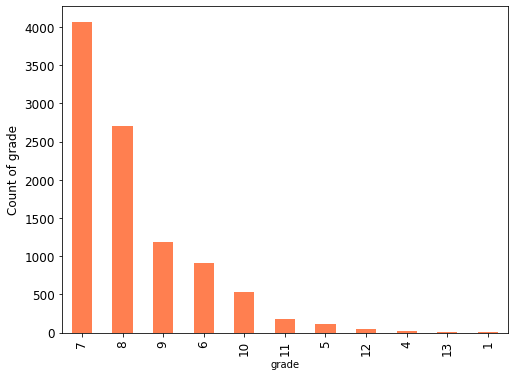

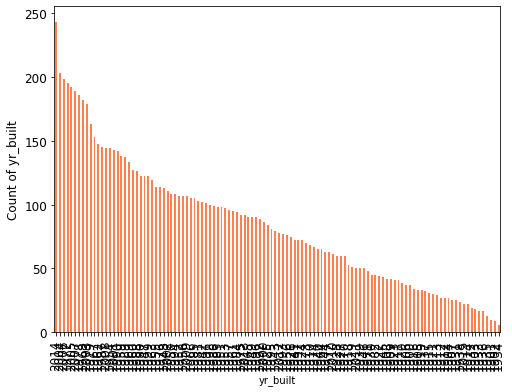

In [8]:
#Univariate Analysis
for feature in numerical:
        
        #Creating Histograms for numerical and continuous columns
        data.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  #Creating histograms for numerical columns

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency of houses",fontsize=12) #Title of y-axis
        plt.title(feature +" Histogram",fontsize=16)  #Title of histogram
               
        
        #Creating Boxplots for numerical and continuous columns
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        data.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot for numerical columns  

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
       
        
    #Creating Barplots for categorical and discrete features
for feature in categorical:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        data[feature].value_counts().plot(kind='bar', figsize=(8,6), color="coral", fontsize=12) #Creating barplot for categorical columns
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
       

### Experiment 4:
Doing the bivariate analysis on the dataset with the target attribute price against each column as we are predicting the price of the house. This helps us understand whether these attributes are correlated with the target variable price.

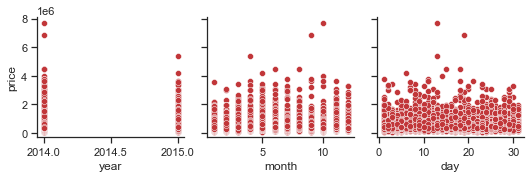

In [9]:
#Bivariate analysis of price and year/month/day
sns.set(style="ticks", color_codes=True,palette='RdBu')
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['year','month','day'])

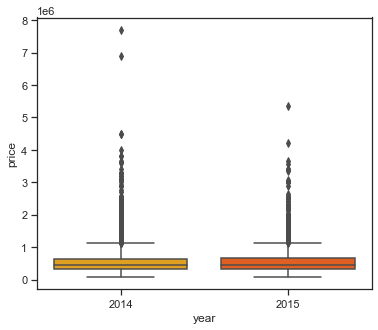

In [10]:
#Bivariate analysis of price and year
sns.boxplot(x = "year",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

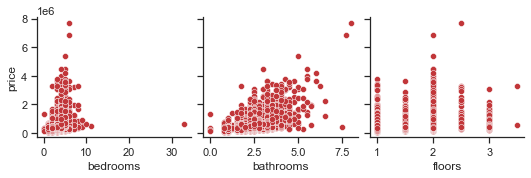

In [11]:
#Bivariate analysis of price and bedrooms/bathrooms/floors
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['bedrooms','bathrooms','floors'])

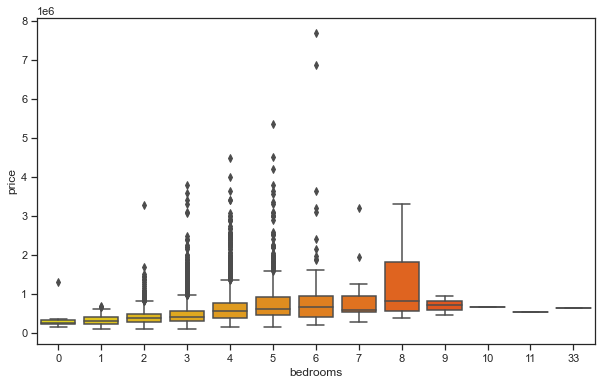

In [12]:
#Bivariate analysis of price and bedrooms
sns.boxplot(x = "bedrooms",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10,6)

plt.show()

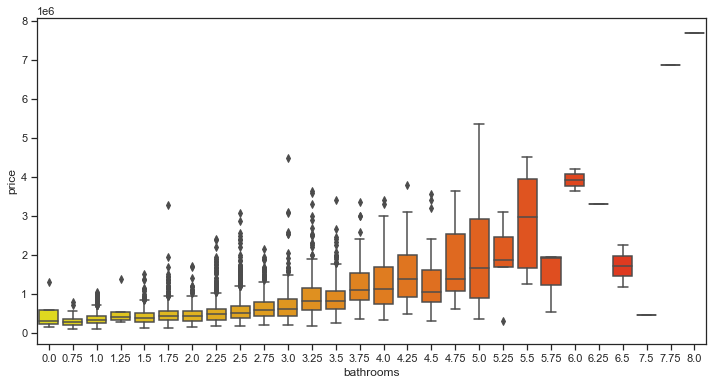

In [13]:
#Bivariate analysis of price and bathrooms
sns.boxplot(x = "bathrooms",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(12, 6)

plt.show()

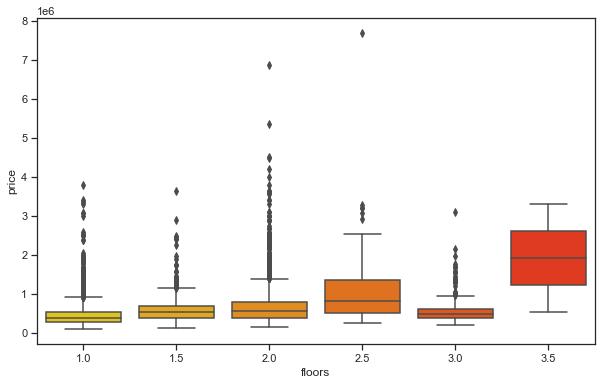

In [14]:
#Bivariate analysis of price and floors
sns.boxplot(x = "floors",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

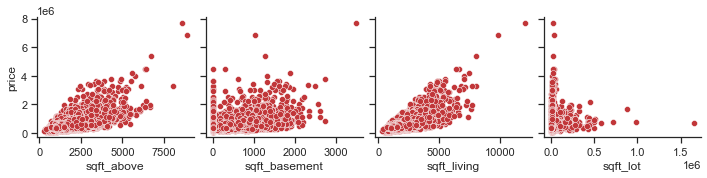

In [15]:
#Bivariate analysis of price and sqft_above/sqft_basement/sqft_living/sqft_lot
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['sqft_above','sqft_basement','sqft_living','sqft_lot'])

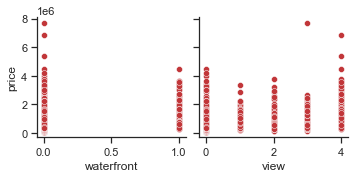

In [16]:
#Bivariate analysis of price and waterfront/view
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['waterfront','view'])

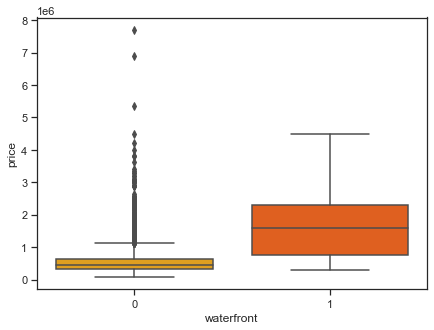

In [17]:
#Bivariate analysis of price and waterfront
sns.boxplot(x = "waterfront",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(7, 5)

plt.show()

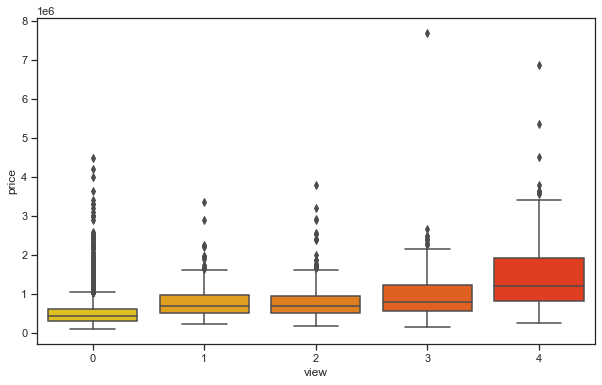

In [18]:
#Bivariate analysis of price and view
sns.boxplot(x = "view",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

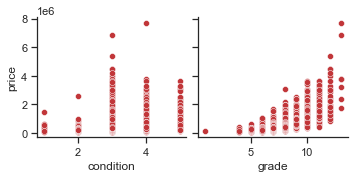

In [19]:
#Bivariate analysis of price and condition/grade
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['condition','grade'])

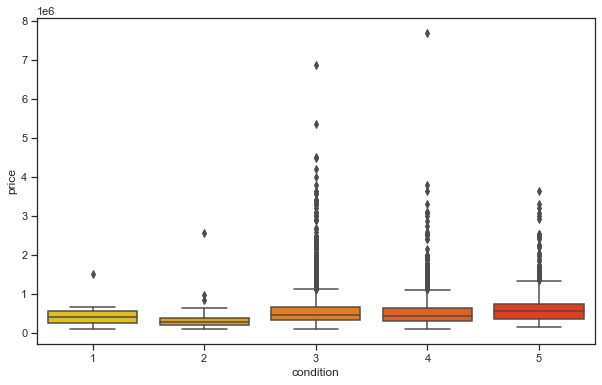

In [20]:
#Bivariate analysis of price and condition
sns.boxplot(x = "condition",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

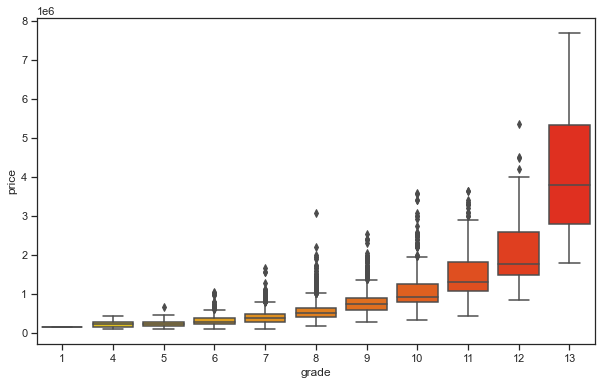

In [21]:
#Bivariate analysis of price and grade
sns.boxplot(x = "grade",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

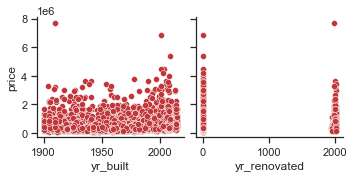

In [22]:
#Bivariate analysis of price and yr_built/yr_renovated
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['yr_built','yr_renovated'])

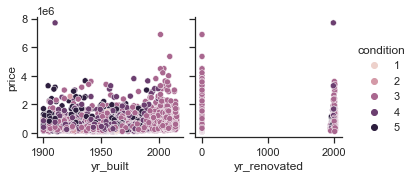

In [23]:
sns.set(style="ticks", color_codes=True, palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['yr_built','yr_renovated'], hue='condition')

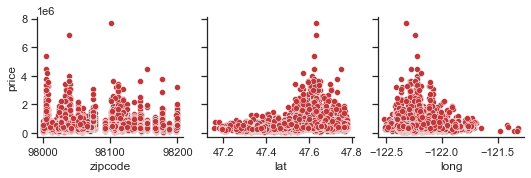

In [24]:
#Bivariate analysis of price and zipcode/lat/long
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['zipcode','lat','long'])

In [25]:
#Plotting the correlation matrix 
corr=data.corr()
corr.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,year,month,day
price,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754,0.014201,-0.019068,-0.014702
bedrooms,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,-0.005814,-0.006170,-0.011797
bathrooms,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,-0.012303,-0.004583,-0.009090
sqft_living,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,-0.016340,0.001445,-0.010158
sqft_lot,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.004337,0.004406,0.010032
floors,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,-0.008066,0.001953,0.003893
waterfront,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,-0.014322,0.015162,0.005732
view,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.003450,-0.005705,0.004273
condition,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.046312,0.016593,-0.004454
grade,0.665567,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.107977,0.201114,-0.012124,-0.009408,-0.014749


### Reporting the findings from univariate and bivariate analysis (EDA)

**Date:** 
The highest sales of houses had happened in April and July 2014. We can reject our earlier hypothesis and also see poor correlation between year/month/date and the price of the house sold.

**Price:**
Average house price in Kings County, Seattle in the  year 2014-2015 was around 0.3M. This is approximately true from the univariate analysis, albeit with significant outliers.

**Bedrooms and Bathrooms:**
Average family size in USA is around 3; and on an average each person might be having 1 bedroom. So, generally houses might have 3 bedrooms. This is true since the highest sales of houses with 3 or more had taken place. There is also a good bivariant correlation between number of bathrooms and the sale price. 

**Sqft_living/Sqft_basement/Sqft_above:**
In 2019, the average sqft_living is around 2,301 square feet. We can see that average sqft_living has remained almost same over the past 5 years; but with significant outliers. There is also the highest bivariant correlation between sqft_living and price sold. It is a similar case with Sqft_basement and Sqft_above.

**Sqft_lot:**
There is a poor correlation between sqft_lot and price of the house sold. Hence, it is not a strong predictor for house price.

**Waterfront:**
We can partly reject the initial hypothesis about the desirability of waterfront. Most of the houses sold do not have a waterfront. And also, the 'waterfront- higher price' link cannot be firmly established.  

**View:**
We can partly reject the initial hypothesis about the desirability of a view. Most of the houses sold do not have a view (0 indexed). And also, the 'view- higher price' link cannot be firmly established, though there a few outliers with 'better view- higher price' hypothesis (4 indexed).

**Condition:**
The highest number of houses sold are belonging to the mid-condition (3 indexed). Even the houses with higher prices are belonging to mid- condition. Hence, we can see that Condition is not a major predictor of price.

**Grade:**
Houses of better grade seem to have higher prices. There is a gradual rise in both quantity (count of houses sold) and price, as the grade rises.

**Yr_built and Yr_renovated:**
There is no strong correlation between the age of the house and the price sold. Among the newly renovated houses, there seems to be a slight positive correlation with higher prices.

**Zipcode – latitude/longitude:**
Houses of both low and high prices are sold at all zipcodes and longitudes. So, there is no strong correlation with the area/locality and the price of house sold. There is however a slight correlation between latitude and the price of house sold.

Text(0.5, 1.0, 'House Prediction Features')

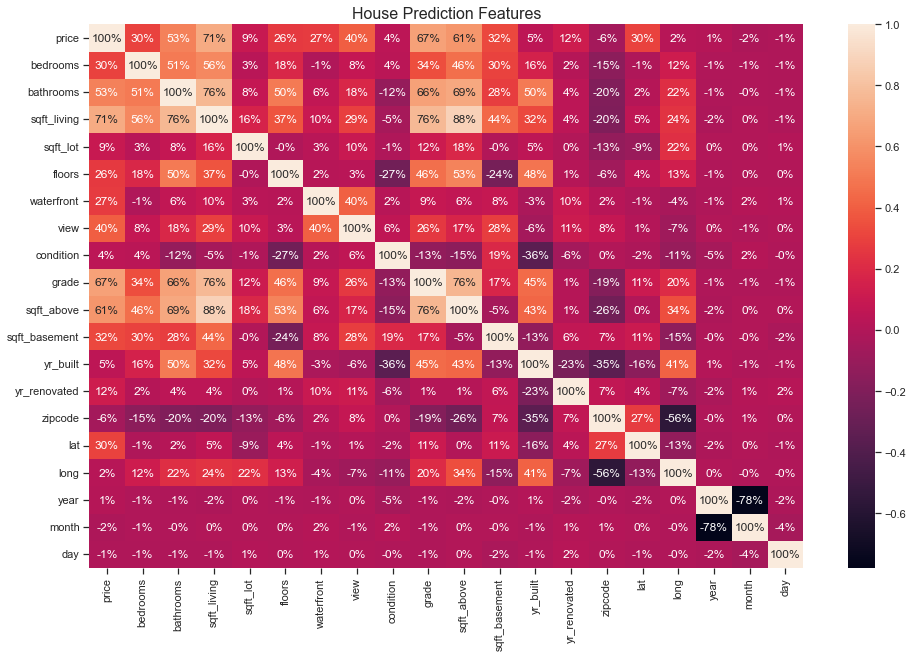

In [26]:
#Heatmap of the dataset
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), annot = True, fmt = '.0%')
plt.title("House Prediction Features", fontsize=16)

### Experiment 5:
Selecting the attributes that are having high correlation with the target attribute price after doing the EDA and making a sets of predictors that we will use further for model fitting

In [27]:
#Finding the correlation between these features
data_x1=data[['sqft_living', 'bathrooms', 'bedrooms', 'view', 'grade', 'sqft_above', 'sqft_basement', 'floors', 'waterfront',
              'lat','zipcode','yr_built']]

Text(0.5, 1.0, 'Features influencing house price')

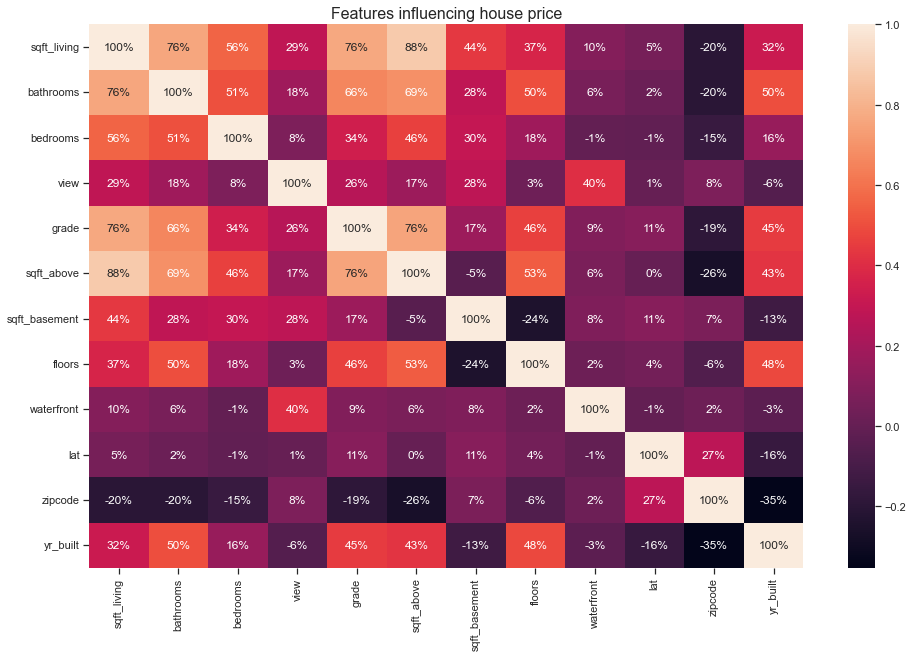

In [28]:
plt.figure(figsize = (16,10))
sns.heatmap(data_x1.corr(), annot = True, fmt = '.0%')
plt.title("Features influencing house price", fontsize=16)

Grouping sets of predictors having highest correlation with Price and least correlation among themselves:

In [29]:
#Set 1 of predictors
data_1=data[['sqft_living', 'view' ,'sqft_basement', 'floors', 'waterfront']]

<AxesSubplot:>

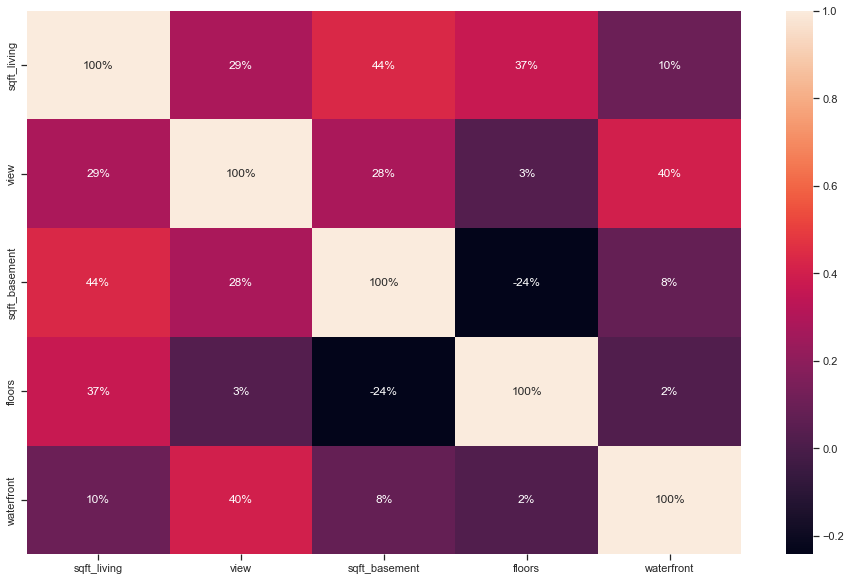

In [30]:
plt.figure(figsize = (16,10))
sns.heatmap(data_1.corr(), annot = True, fmt = '.0%')

In [31]:
#Set 2 of predictors
data_2=data[['grade', 'view' , 'sqft_basement', 'bedrooms', 'waterfront']]

<AxesSubplot:>

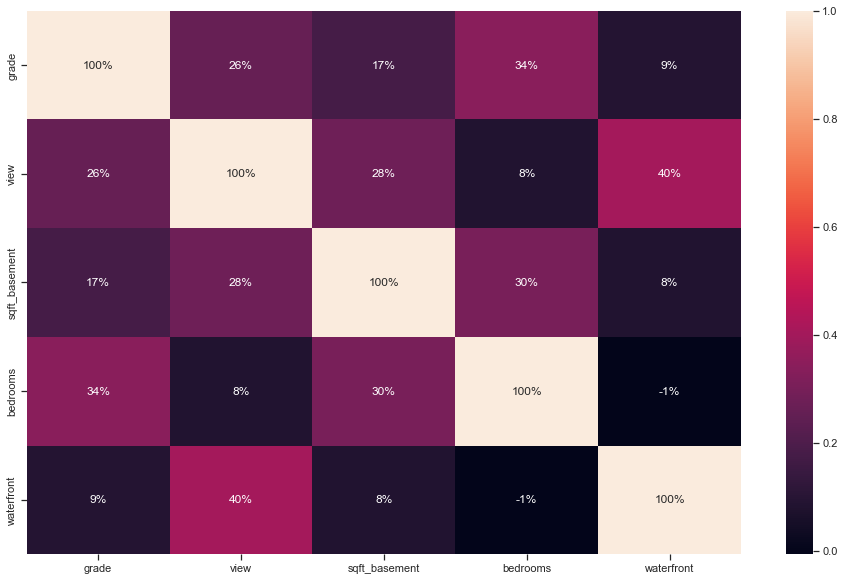

In [32]:
plt.figure(figsize = (16,10))
sns.heatmap(data_2.corr(), annot = True, fmt = '.0%')

In [33]:
#Set 3 of predictors
data_3= data[[ 'bathrooms', 'waterfront', 'view', 'sqft_basement']]

<AxesSubplot:>

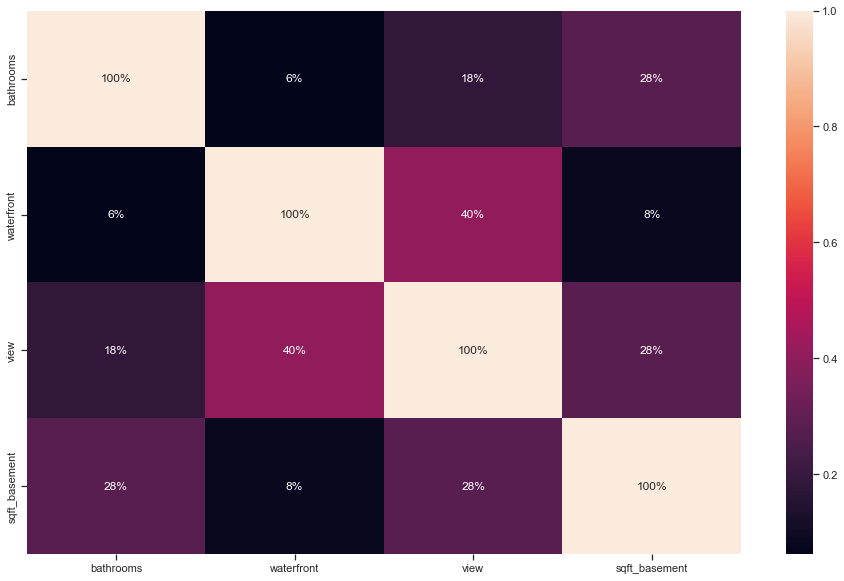

In [34]:
plt.figure(figsize = (16,10))
sns.heatmap(data_3.corr(), annot = True, fmt = '.0%')

In [35]:
#Set 4 of predictors
data_4= data[['sqft_living','bathrooms','condition','zipcode','yr_built','grade','lat']]

<AxesSubplot:>

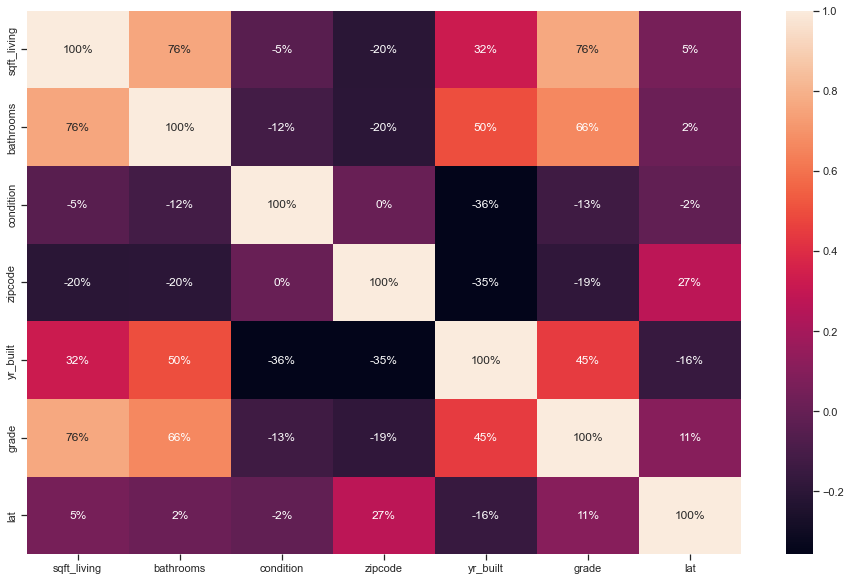

In [36]:
plt.figure(figsize = (16,10))
sns.heatmap(data_4.corr(), annot = True, fmt = '.0%')

### Experiment 6:
Fitting these set of predictors in the decision tree model and finding the model performance. This will help us decide which set of predictors give best results.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#For plotting a decision tree
from sklearn import tree

#For getting the r_score value
from sklearn.metrics import r2_score

#For cross validation
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### SET 1 - Predictors

In [38]:
#Taking predictors and targets as X and y respectively
X=data[['sqft_living', 'view' ,'sqft_basement', 'floors', 'waterfront']]
y=data['price']

In [39]:
X.head()

,sqft_living,view,sqft_basement,floors,waterfront
0,1960,0,910,1.0,0
1,5420,0,1530,1.0,0
2,1160,0,300,1.0,0
3,1430,0,0,1.5,0
4,1370,0,0,1.0,0


In [40]:
y.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [41]:
## Splitting the data into train and test dataset in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [42]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 6
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)

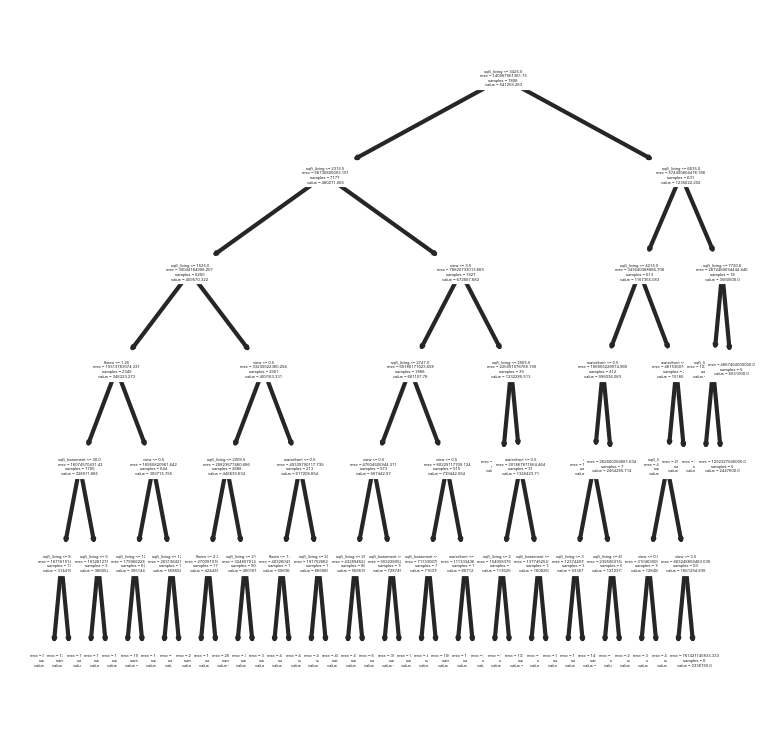

In [43]:
### Plotting a Regression Tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [44]:
#Predicting the y values after fitting X_test into the trained model
y_pred = reg_tree.predict(X_test)
y_pred

array([1195050.32786885,  412152.49099099,  420735.45979021, ...,
       1195050.32786885,  469721.67556468,  623248.60606061])

In [ ]:
### Model Performance Checks

In [45]:
# RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

251315.18878285115

In [46]:
#R score
r2_score(y_test, y_pred)

0.5956828642655164

In [47]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - y_pred))

162635.27712634648

In [48]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred)/y_test)*100

33.66916748739815

In [49]:
### 10 - Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    scores = cross_val_score(dtr, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())

In [50]:
error = [1- x for x in cv_scores]
error

[0.721683179654723,
 0.581757254762269,
 0.5342522161313644,
 0.4690305355664579,
 0.4515651727242239,
 0.4469105438108858,
 0.44994576547430865,
 0.45978986796798704,
 0.46610272167172284,
 0.48017058338599095,
 0.4850558403647559,
 0.49593848958346676,
 0.499120851713276,
 0.5035608187319763]

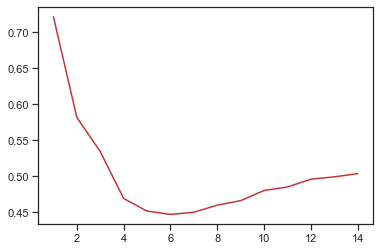

In [51]:
plt.plot(depth, error)
plt.show()   #depth 6

### SET 2 Predictors

In [52]:
#Taking predictors and targets as X and y respectively
X2 = data[['grade', 'view' , 'sqft_basement', 'bedrooms', 'waterfront']]
y2 = data['price']

In [53]:
X2.head()

,grade,view,sqft_basement,bedrooms,waterfront
0,7,0,910,4,0
1,11,0,1530,4,0
2,7,0,300,2,0
3,7,0,0,3,0
4,7,0,0,3,0


In [54]:
y2.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [55]:
## Splitting the data into train and test dataset in the ratio of 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2,random_state=42)

In [56]:
#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 7
reg_tree.fit(X_train2, y_train2)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

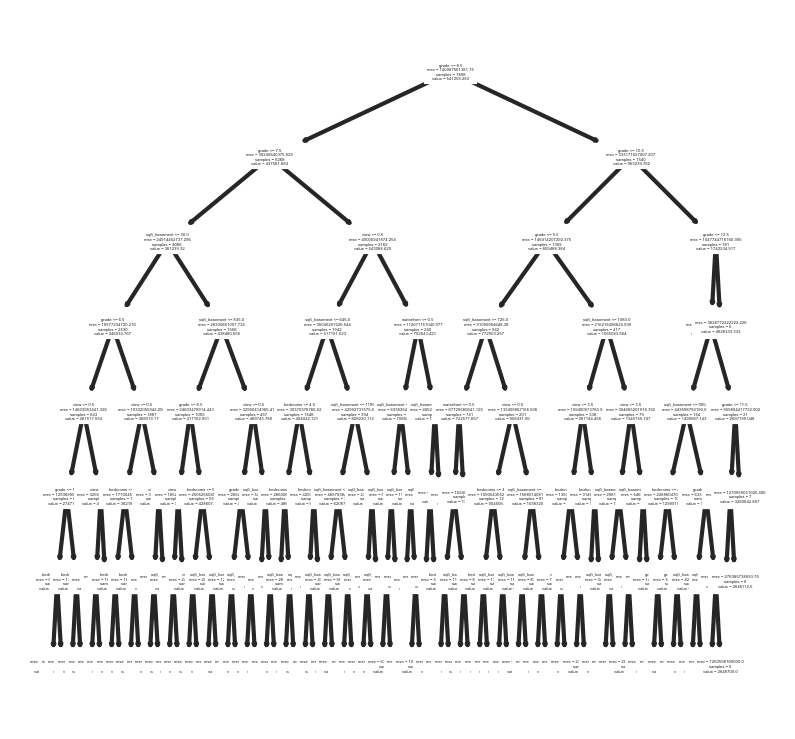

In [57]:
### Plotting a Regression Tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X2), filled = False)

plt.show()

In [58]:
#Predicting the y values after fitting X_test into the trained model
y_pred2 = reg_tree.predict(X_test2)
y_pred2

array([ 980053.42553191,  344139.16453382,  484073.74399399, ...,
       1599460.71428571,  393476.49877751,  766212.66666667])

In [ ]:
### Model Performance Checks

In [59]:
# RMSE
np.sqrt(np.mean((y_test2 - y_pred2)**2))

270243.8919840166

In [60]:
#R score
r2_score(y_test2, y_pred2)

0.5324840330005745

In [61]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test2 - y_pred2))

160657.7155494981

In [62]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test2 - y_pred2)/y_test2)*100

31.369997778453385

In [63]:
#10 Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    scores = cross_val_score(dtr, X_train2, y_train2, cv=10)
    cv_scores.append(scores.mean())

In [64]:
error = [1- x for x in cv_scores]
error

[0.7030704357854272,
 0.5637473964968767,
 0.5127331557009578,
 0.4608813231813895,
 0.42509644308116457,
 0.4225805890063121,
 0.41978268780307915,
 0.421250367521287,
 0.42660601130776354,
 0.428614760800355,
 0.4308013422263901,
 0.43211590137206357,
 0.43372388211783064,
 0.43437937299710694]

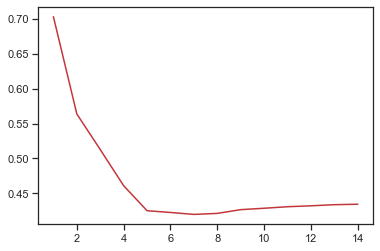

In [65]:
plt.plot(depth, error)
plt.show()    #depth 7

### SET 3 Predictors

In [66]:
#Taking predictors and targets as X and y respectively
X3 = data[['bathrooms', 'waterfront', 'view', 'sqft_basement']]
y3 = data['price']

In [67]:
X3.head()

,bathrooms,waterfront,view,sqft_basement
0,3.00,0,0,910
1,4.50,0,0,1530
2,1.00,0,0,300
3,1.00,0,0,0
4,1.75,0,0,0


In [68]:
y3.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [69]:
### Splitting the data into train and test dataset in the ratio of 80:20
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2,random_state=42)

In [70]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 5
reg_tree.fit(X_train3, y_train3)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

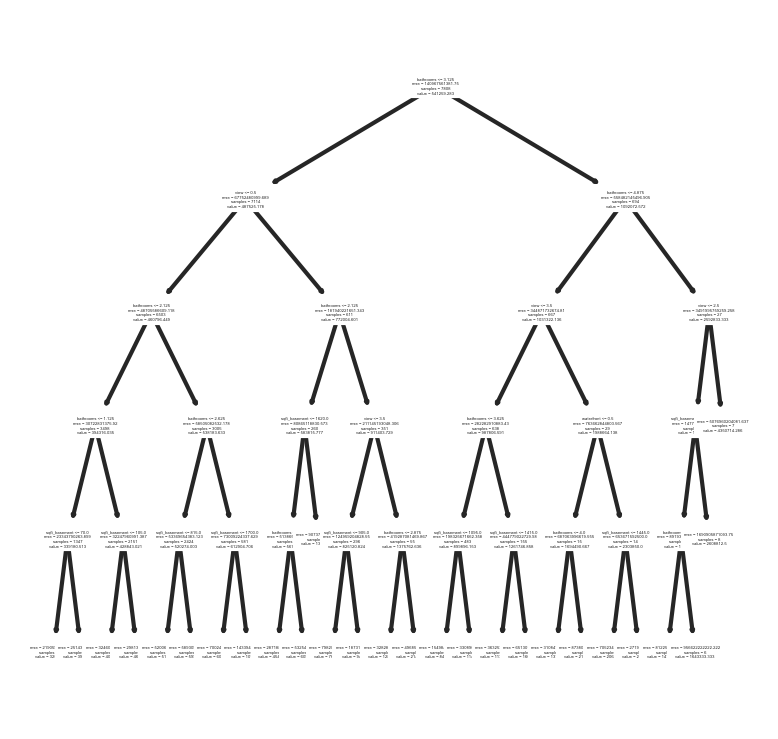

In [71]:
### Plotting a Regression Tree

fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X3), filled = False)

plt.show()

In [72]:
#Predicting the y values after fitting X_test into the trained model
y_pred3 = reg_tree.predict(X_test3)
y_pred3

array([1179936.14728682,  401117.46906355,  401117.46906355, ...,
       1179936.14728682,  401117.46906355,  609070.79679144])

In [ ]:
### Model Performance Checks

In [73]:
# RMSE
np.sqrt(np.mean((y_test3 - y_pred3)**2))

301881.5214935131

In [74]:
#R score
r2_score(y_test3, y_pred3)

0.4166116738156307

In [75]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test3 - y_pred3))

190649.98955904468

In [76]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test3 - y_pred3)/y_test3)*100

39.30219856155676

In [77]:
#10 Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    scores = cross_val_score(dtr, X_train3, y_train3, cv=10)
    cv_scores.append(scores.mean())

In [78]:
error = [1- x for x in cv_scores]
error

[0.7884580248167836,
 0.7391823305557647,
 0.6657073907107899,
 0.6315735640949416,
 0.6090712854500774,
 0.6120776184352222,
 0.620621501679105,
 0.6318255811040774,
 0.6426903559496391,
 0.6489843543837657,
 0.6519383822995207,
 0.656768365715276,
 0.6582655507907444,
 0.6587370306701382]

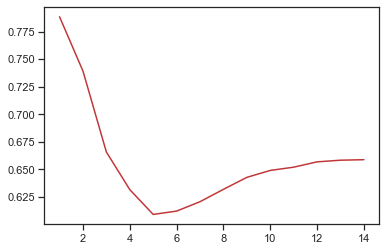

In [79]:
plt.plot(depth, error)
plt.show()    #depth 5

### SET 4 Predictors

In [92]:
#Taking predictors and targets as X and y respectively
X4 = data[['sqft_living','bathrooms','condition','zipcode','yr_built','grade','lat']]
y4 = data['price']

In [93]:
### Splitting the data into train and test dataset in the ratio of 80:20
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2,random_state=42)

In [94]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 8
reg_tree.fit(X_train4, y_train4)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)

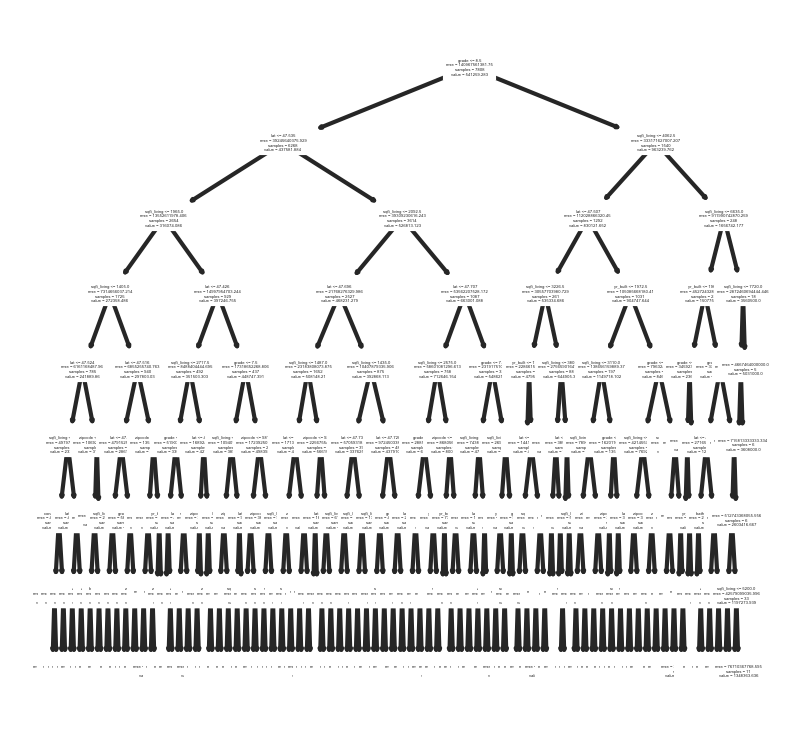

In [95]:
### Plotting a Regression Tree

fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X4), filled = False)

plt.show()

In [96]:
#Predicting the y values after fitting X_test into the trained model
y_pred4 = reg_tree.predict(X_test4)
y_pred4

array([ 646375.        ,  291543.74663073,  547923.11006289, ...,
       1121729.09090909,  668622.79347826,  742280.33333333])

In [97]:
# RMSE
np.sqrt(np.mean((y_test4 - y_pred4)**2))

203712.68043016663

In [98]:
#R score
r2_score(y_test4, y_pred4)

0.7343432834697227

In [99]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test4 - y_pred4))

107677.79404295671

In [100]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test4 - y_pred4)/y_test4)*100

18.699174316725777

In [89]:
#10 Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    scores = cross_val_score(dtr, X_train4, y_train4, cv=10)
    cv_scores.append(scores.mean())

In [90]:
error = [1- x for x in cv_scores]
error

[0.7030704357854272,
 0.5283178099432482,
 0.44389972065628003,
 0.4045770398686914,
 0.3691787467703199,
 0.34307565440166976,
 0.3289286134659506,
 0.31990476478843843,
 0.3175114264150545,
 0.31828887303110887,
 0.3182720289540304,
 0.3178153992331295,
 0.3198334244099039,
 0.3197902356376675]

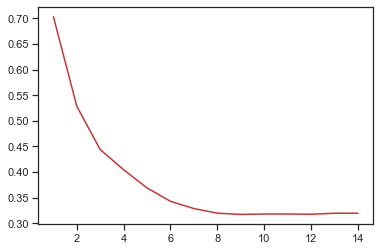

In [91]:
plt.plot(depth, error)
plt.show()    #depth 8

In [ ]:
#Among the 4 set of predictors set 4 seems to give the best model performance. 

### Experiment 7
Performing log transformations on the attributes that are heavily skewed. 

In [ ]:
https://onlinestatbook.com/2/transformations/log.html

In such cases, you normally
choose the logarithmic transformation, but this transformation requires positive
values. If you work with just positive numbers and the problem is the zero, add 1
to your values so that none of them will be zero. (The result of log(1) is actually
zero, making it a convenient new starting point.)

In [107]:
df = pd.read_csv('kc_house_train_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [108]:
df['sqft_living'] = np.exp(df['sqft_living'])  # transforming the sqft_living column on exponential basis

In [110]:
df.head()

# since the sqft_living column is showing inf ( very large ) values it may not be feasable for analysis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,inf,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,inf,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,inf,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,inf,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,inf,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [111]:
df = pd.read_csv('kc_house_train_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [112]:
df['sqft_living'] = np.sqrt(df['sqft_living']) # # transforming the sqft_living column on square root basis

In [113]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,44.271887,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,73.620649,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,34.058773,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,37.815341,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,37.013511,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

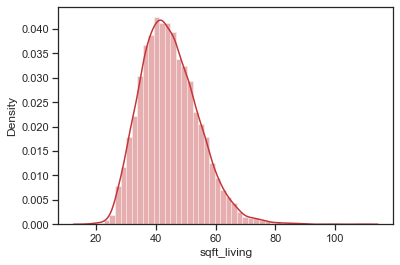

In [114]:
sns.distplot(df['sqft_living'])

# since the transformed column is still right skewed, sqrt transformation may not be feasible 

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

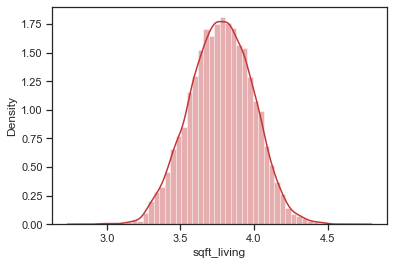

In [121]:
#Log transforming the column since it reduces the skeweness to a greater extent
df['sqft_living'] = np.log(df['sqft_living'])
sns.distplot(df['sqft_living'])

In [117]:
#Reading the data again
data = pd.read_csv('kc_house_train_data.csv')

In [118]:
#Splitting the date column as year, month and day
dateTime=pd.DatetimeIndex(data.date)
data['year']=dateTime.year
data['month']=dateTime.month
data['day']=dateTime.day
data.drop(columns=['date'],inplace=True)
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [119]:
#Dropping the id, sqft_living15 and sqft_lot15 columns
data = data.drop(['id', 'sqft_living15', 'sqft_lot15'],axis=1)

In [120]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,year,month,day
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,2014,12,9
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,2014,5,12
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,2014,5,27
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,2014,5,28
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,2014,10,7


In [ ]:
#Since the logarithm transformation has minimized the skeweness to a larger extent, we can go forward for our
#decision tree algorithm.

### Experiment 8
Performing feature engineering on the attributes in the dataset

In [122]:
#Feature engineering on the yr_built column to know the age of the house
data['age'] = data['year'] - data['yr_built']

In [124]:
#Feature engineering on the yr_renovated column to know whether the house was renovated or not
data['renovated']=data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [125]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,year,month,day,age,renovated
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,2014,12,9,49,0
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,2001,0,98053,47.6561,-122.005,2014,5,12,13,0
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,1942,0,98115,47.6900,-122.292,2014,5,27,72,0
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,1927,0,98028,47.7558,-122.229,2014,5,28,87,0
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,1977,0,98074,47.6127,-122.045,2014,10,7,37,0


In [126]:
#One hot encoding the feature engineered column yr_renovated
one_hot_encoded_data = pd.get_dummies(data.renovated, columns = ['Renovated', 'Not_Renovated'])
print(one_hot_encoded_data)

      0  1
0     1  0
1     1  0
2     1  0
3     1  0
4     1  0
...  .. ..
9756  1  0
9757  1  0
9758  1  0
9759  1  0
9760  1  0

[9761 rows x 2 columns]


### Experiment 9
Model fitting on the set of predictors after performing feature engineering and log transformation on the heavily skewed attribute

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

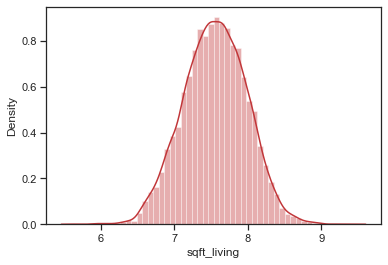

In [127]:
#Logarithm Transformation on the sqft_living column 
data.sqft_living = np.log(data.sqft_living)
sns.distplot(data.sqft_living)

### Set 1 Predictors

In [139]:
#Taking predictors and targets as X and y respectively
X_log1=data[['sqft_living', 'view' , 'sqft_basement', 'floors', 'waterfront']]
y_log1=data['price']

In [140]:
X_log1.head()

,sqft_living,view,sqft_basement,floors,waterfront
0,7.580700,0,910,1.0,0
1,8.597851,0,1530,1.0,0
2,7.056175,0,300,1.0,0
3,7.265430,0,0,1.5,0
4,7.222566,0,0,1.0,0


In [141]:
y_log1.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [142]:
## Splitting the data into train and test dataset in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X_log1, y_log1, test_size = 0.2,random_state=42)

In [143]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 7
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

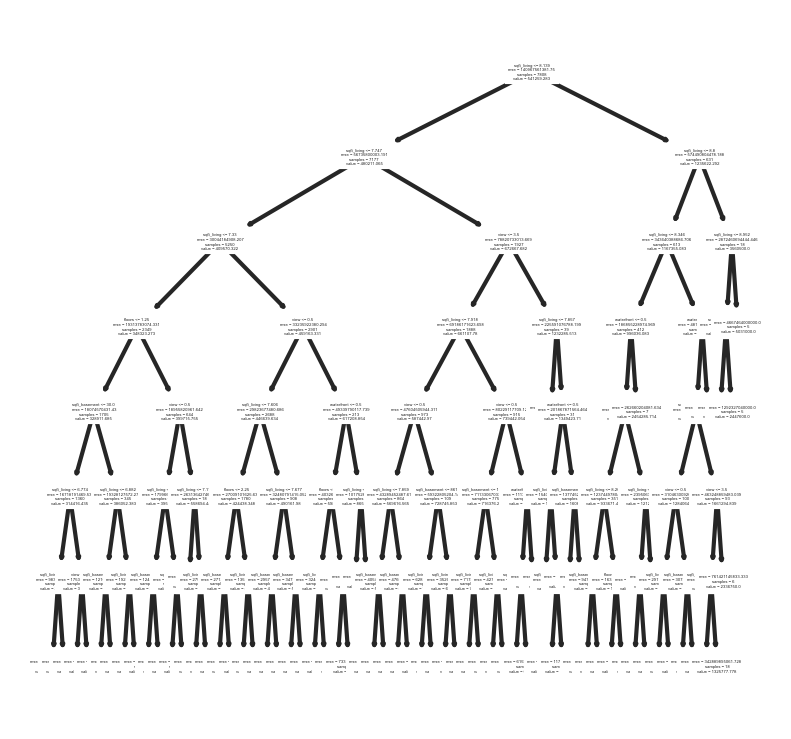

In [144]:
### Plotting a Regression Tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X_log1), filled = False)

plt.show()

In [145]:
#Predicting the y values after fitting X_test into the trained model
y_pred = reg_tree.predict(X_test)
y_pred

array([1127275.96153846,  439863.2254902 ,  408254.07332625, ...,
       1586635.55555556,  445097.525     ,  537716.        ])

In [146]:
#RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

253323.67099613976

In [147]:
#R score
r2_score(y_test, y_pred)

0.5891945279261477

In [148]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - y_pred))

162317.1963227672

In [149]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_pred)/y_test)*100

33.37594941510577

### Set 2 Predictors

In [150]:
#Taking predictors and targets as X and y respectively
X_log2=data[['grade', 'view' , 'sqft_basement', 'bedrooms', 'waterfront']]
y_log2=data['price']

In [151]:
## Splitting the data into train and test dataset in the ratio of 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_log2, y_log2, test_size = 0.2,random_state=42)

In [152]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 7
reg_tree.fit(X_train2, y_train2)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

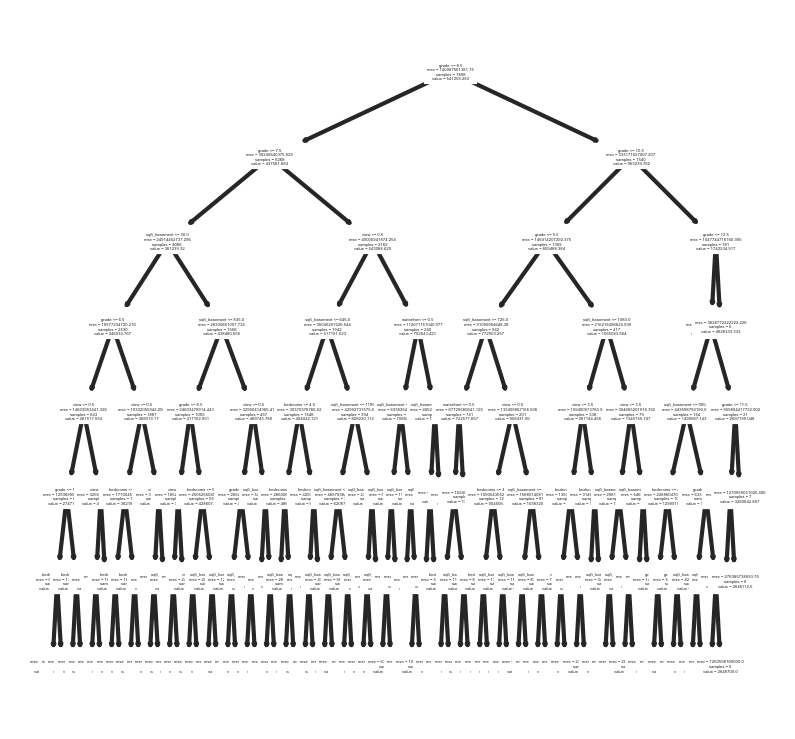

In [153]:
### Plotting a Regression Tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X_log2), filled = False)

plt.show()

In [154]:
#Predicting the y values after fitting X_test into the trained model
y_pred2 = reg_tree.predict(X_test2)
y_pred2

array([ 980053.42553191,  344139.16453382,  484073.74399399, ...,
       1599460.71428571,  393476.49877751,  766212.66666667])

In [155]:
# RMSE
np.sqrt(np.mean((y_test2 - y_pred2)**2))

270243.8919840166

In [156]:
#R score
r2_score(y_test2, y_pred2)

0.5324840330005745

In [157]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test2 - y_pred2))

160657.7155494981

In [158]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test2 - y_pred2)/y_test2)*100

31.369997778453385

In [159]:
#10 Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    scores = cross_val_score(dtr, X_train2, y_train2, cv=10)
    cv_scores.append(scores.mean())

In [160]:
error = [1- x for x in cv_scores]
error

[0.7030704357854272,
 0.5637473964968767,
 0.5127331557009578,
 0.4608813231813895,
 0.42509644308116457,
 0.4225805890063121,
 0.41978268780307915,
 0.421250367521287,
 0.42685227322582686,
 0.42836849888229145,
 0.4308013422263901,
 0.43211590137206357,
 0.43372388211783064,
 0.43437937299710694]

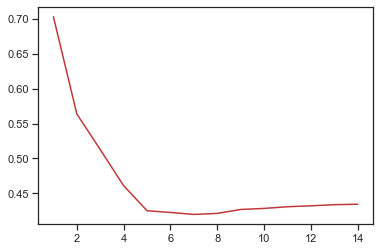

In [161]:
plt.plot(depth, error)
plt.show()    #depth 7

### Set 3 Predictors

In [162]:
#Taking predictors and targets as X and y respectively
X3 = data[['bathrooms', 'waterfront', 'view', 'sqft_basement']]
y3 = data['price']

In [163]:
X3.head()

,bathrooms,waterfront,view,sqft_basement
0,3.00,0,0,910
1,4.50,0,0,1530
2,1.00,0,0,300
3,1.00,0,0,0
4,1.75,0,0,0


In [164]:
y3.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [165]:
### Splitting the data into train and test dataset in the ratio of 80:20
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2,random_state=42)

In [166]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 5
reg_tree.fit(X_train3, y_train3)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

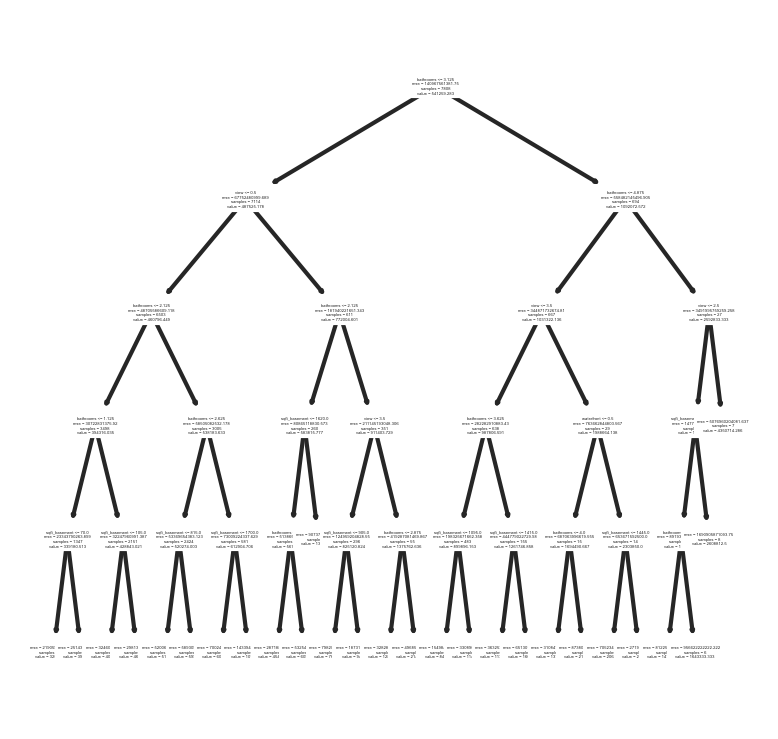

In [167]:
### Plotting a Regression Tree

fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X3), filled = False)

plt.show()

In [168]:
#Predicting the y values after fitting X_test into the trained model
y_pred3 = reg_tree.predict(X_test3)
y_pred3

array([1179936.14728682,  401117.46906355,  401117.46906355, ...,
       1179936.14728682,  401117.46906355,  609070.79679144])

In [169]:
# RMSE
np.sqrt(np.mean((y_test3 - y_pred3)**2))

301881.5214935131

In [170]:
#R score
r2_score(y_test3, y_pred3)

0.4166116738156307

In [171]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test3 - y_pred3))

190649.98955904468

In [172]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test3 - y_pred3)/y_test3)*100

39.30219856155676

### Set 4 Predictors

In [205]:
#Taking predictors and targets as X and y respectively
X4_log = data[['sqft_living','bathrooms','condition','zipcode','yr_built','grade','lat']]
y4_log = data['price']

In [206]:
X4_log.head()

,sqft_living,bathrooms,condition,zipcode,yr_built,grade,lat
0,7.580700,3.00,5,98136,1965,7,47.5208
1,8.597851,4.50,3,98053,2001,11,47.6561
2,7.056175,1.00,4,98115,1942,7,47.6900
3,7.265430,1.00,4,98028,1927,7,47.7558
4,7.222566,1.75,4,98074,1977,7,47.6127


In [207]:
y4_log.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [208]:
### Splitting the data into train and test dataset in the ratio of 80:20
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4_log, y4_log, test_size = 0.2,random_state=42)

In [209]:
### Fitting a Regression Tree

#Taking a maximum depth and minimum sample leaf of regression tree
#The values would change after cross validation
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)   #after 10 fold cross validation, the max depth is 9
reg_tree.fit(X_train4, y_train4)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)

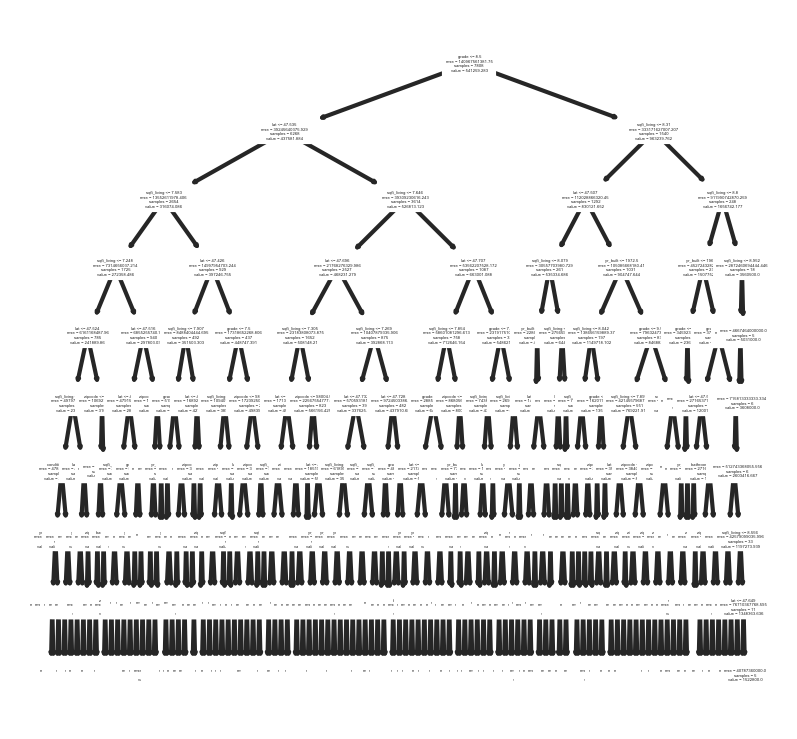

In [210]:
### Plotting a Regression Tree

fig, axes = plt.subplots(figsize=(3,3), dpi=300)   #Setting the figure size and dpi
tree.plot_tree(reg_tree, feature_names=list(X4_log), filled = False)

plt.show()

In [211]:
#Predicting the y values after fitting X_test into the trained model
y_pred4 = reg_tree.predict(X_test4)
y_pred4

array([ 646375.        ,  296373.66060606,  572221.44134078, ...,
       1067642.85714286,  659440.1954023 ,  809299.15254237])

In [212]:
# RMSE
np.sqrt(np.mean((y_test4 - y_pred4)**2))

194742.8238383052

In [213]:
#R score
r2_score(y_test4, y_pred4)

0.7572229665424391

In [214]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test4 - y_pred4))

103958.50431471114

In [215]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test4 - y_pred4)/y_test4)*100

18.078814109768427

### Decision Tree Regressor is giving MAPE 18.07 and this is the least error by taking the best combination of predictors

**Documentation:**  
**Various other predictor sets and the results that were tried before finalizing the best predictor set**

**Set 1:**

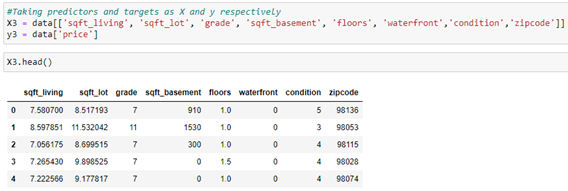

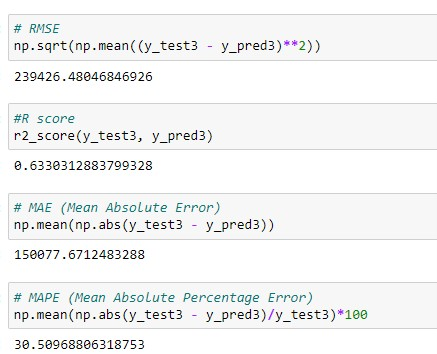

**Set 2:**

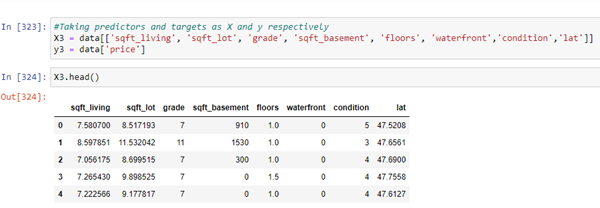

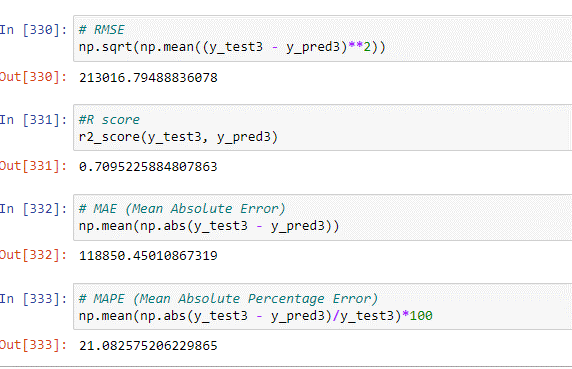

**Set 3:**

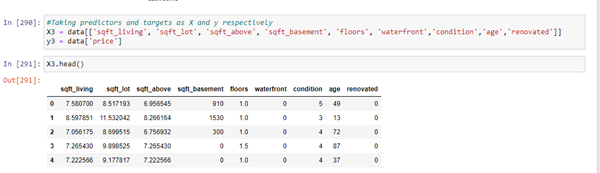

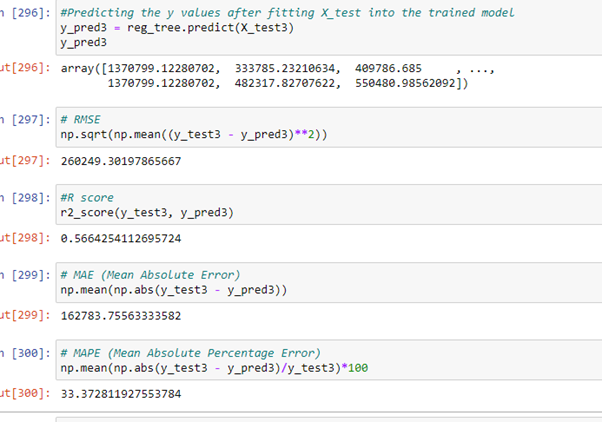

**Set 4:**

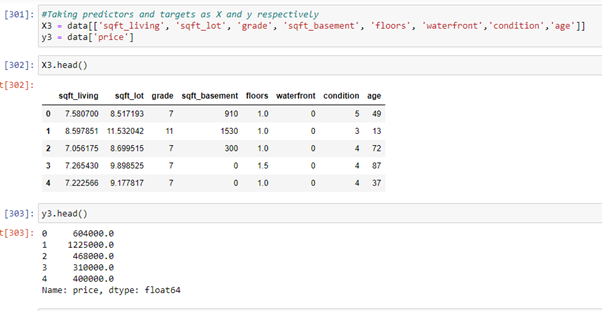

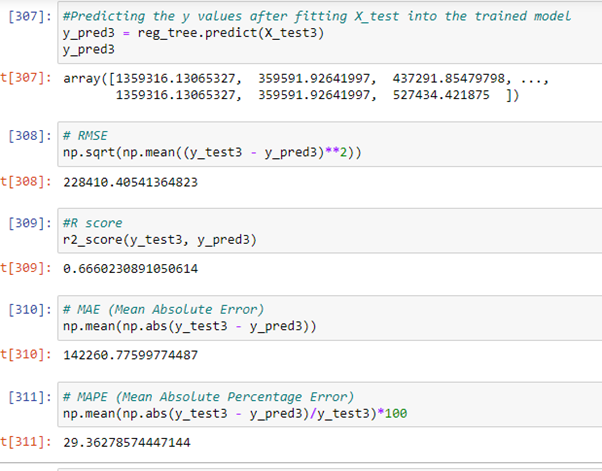

**Set 5:**

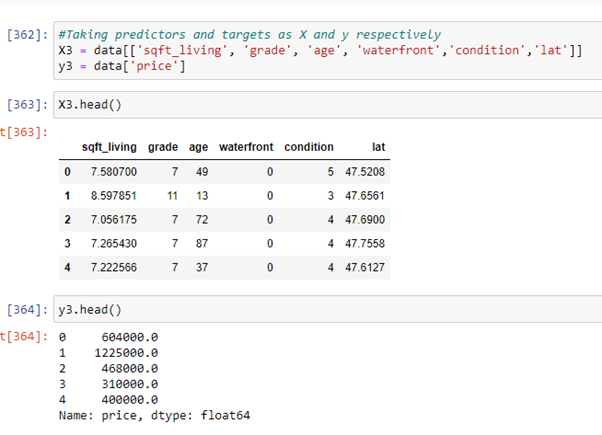

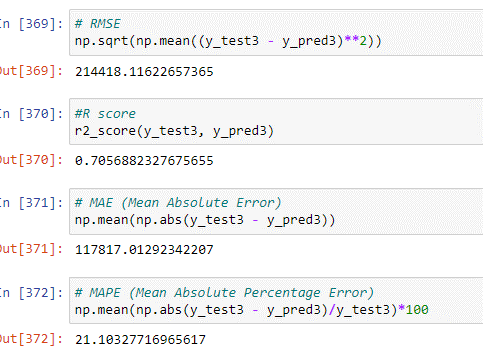

### Before Feature Engineering on the best set of predictors(set 4) : ['sqft_living','bathrooms','condition','zipcode','yr_built','grade','lat']
Performance Check :

RMSE = 203712.68  
R Score = 0.73  
MAE = 107677.79  
MAPE = 18.70

### After Feature Engineering on the best set of predictors(set 4) : ['sqft_living','bathrooms','condition','zipcode','yr_built','grade','lat']
Performance Check :

RMSE = 194742.82   
R Score = 0.75  
MAE = 103958.50  
MAPE = 18.07

In [ ]:
#There is a significant improvement in the performance of the model by applying the log transformation 

### Experiment 10
Fitting the model in the test dataset

In [216]:
os.chdir(r'C:\Users\ssupa\Desktop\Python Projects\IML\ML Assignment')

#Reading the dataset
test_data = pd.read_csv('kc_house_test_data.csv')

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

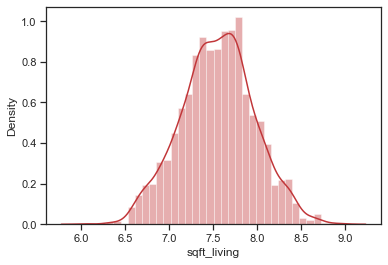

In [217]:
#Logarithm Transformation on the sqft_living column 
test_data.sqft_living = np.log(test_data.sqft_living)
sns.distplot(test_data.sqft_living)

In [218]:
#Taking predictors and targets as X and y respectively
test_data_X=data[['sqft_living','bathrooms','condition','zipcode','yr_built','grade','lat']]
test_data_y=data['price']

In [219]:
test_data_X.head()

,sqft_living,bathrooms,condition,zipcode,yr_built,grade,lat
0,7.580700,3.00,5,98136,1965,7,47.5208
1,8.597851,4.50,3,98053,2001,11,47.6561
2,7.056175,1.00,4,98115,1942,7,47.6900
3,7.265430,1.00,4,98028,1927,7,47.7558
4,7.222566,1.75,4,98074,1977,7,47.6127


In [220]:
test_data_y.head()

0     604000.0
1    1225000.0
2     468000.0
3     310000.0
4     400000.0
Name: price, dtype: float64

In [221]:
#Predicting the y values after fitting X_test into the trained model
y_test_pred = reg_tree.predict(test_data_X)
y_test_pred

array([ 582142.85714286, 1522800.        ,  545374.41743119, ...,
        754438.23529412,  309338.42105263,  309338.42105263])

In [222]:
# RMSE
rmse = np.sqrt(np.mean((test_data_y - y_test_pred)**2))
rmse

157632.75618291835

In [223]:
#R score
r2_score(test_data_y, y_test_pred)

0.8274755637328507

In [224]:
# MAE (Mean Absolute Error)
np.mean(np.abs(test_data_y - y_test_pred))

86963.47344720246

In [225]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(test_data_y - y_test_pred)/test_data_y)*100

15.999409284301816

### Decision Tree Regressor is giving MAPE 15.99 on test data, this is the least error by taking the best combination of predictors

### The model has been trained well and the decision tree algorith is giving the pertinent result on the test data.

### Experiment 11
Perfoming the model fitting on the KNN Regressor for the same set of predictors to compare the best model.

In [356]:
data_knn = pd.read_csv('kc_house_test_data.csv')

In [357]:
#Splitting the date column as year, month and day
dateTime=pd.DatetimeIndex(data_knn.date)
data_knn['year']=dateTime.year
data_knn['month']=dateTime.month
data_knn['day']=dateTime.day
data_knn.drop(columns=['date'],inplace=True)
data_knn.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [358]:
data_knn['age'] = data_knn['year'] - data_knn['yr_built']

In [359]:
data_knn.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,age
0,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,...,0,98038,47.3684,-122.031,2390,7570,2015,3,12,12
1,1175000570,530000.0,5,2.00,1810,4850,1.5,0,0,3,...,0,98107,47.6700,-122.394,1360,4850,2015,3,12,115
2,16000397,189000.0,2,1.00,1200,9850,1.0,0,0,4,...,0,98002,47.3089,-122.210,1060,5095,2014,12,5,93
3,461000390,687500.0,4,1.75,2330,5000,1.5,0,0,4,...,0,98117,47.6823,-122.368,1460,5000,2014,6,24,85
4,7895500070,240000.0,4,1.00,1220,8075,1.0,0,0,2,...,0,98001,47.3341,-122.282,1290,7800,2015,2,13,46


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

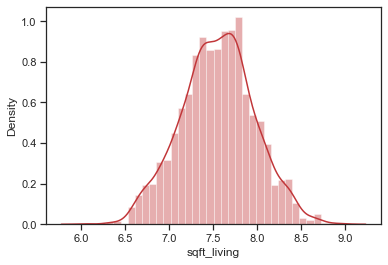

In [360]:
#Logarithm Transformation on the sqft_living column 
data_knn.sqft_living = np.log(data_knn.sqft_living)
sns.distplot(data_knn.sqft_living)

In [361]:
#Taking predictors and targets as X and y respectively
knn_X=data_knn[['sqft_living','bathrooms','condition','zipcode','age','grade','lat']]
knn_y=data_knn['price']

In [362]:
from sklearn.neighbors import KNeighborsRegressor

# Step-1: instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean') # 3-NN using euclidean distance

# Step-2: fitting the model
knn.fit(X_train4, y_train4)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [363]:
#Make prediction on the test data
y_test_pred = knn.predict(test_data_X)
y_test_pred

array([ 595333.33333333, 1421666.66666667,  434333.33333333, ...,
        774666.66666667,  340000.        ,  340000.        ])

In [364]:
# RMSE
rmse = np.sqrt(np.mean((test_data_y - y_test_pred)**2))
rmse

188777.97600593825

In [365]:
#R score
r2_score(test_data_y, y_test_pred)

0.752565456704791

In [366]:
# MAE (Mean Absolute Error)
np.mean(np.abs(test_data_y - y_test_pred))

93319.65567052558

In [367]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(test_data_y - y_test_pred)/test_data_y)*100

16.823483770068446

In [368]:
from sklearn.neighbors import KNeighborsRegressor

In [369]:
from sklearn.model_selection import cross_val_score

In [372]:
#Using Cross-Validation to choose optimal k
neighbors = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    scores = cross_val_score(knn, X_train4, y_train4, cv=10)
    cv_scores.append(scores.mean())

In [373]:
# changing to misclassification error (1 - accuracy)
Error = [1 - x for x in cv_scores]
Error

[0.4848195071870861,
 0.44184112218813554,
 0.4305984052468672,
 0.44223197005770554,
 0.4526359944684717,
 0.4599653440370358,
 0.47341459222071225,
 0.4842154959747089,
 0.4960784230591806,
 0.5049560009581631,
 0.5159230742245684,
 0.5191693681857004,
 0.5298302775117751,
 0.5370892932839283]

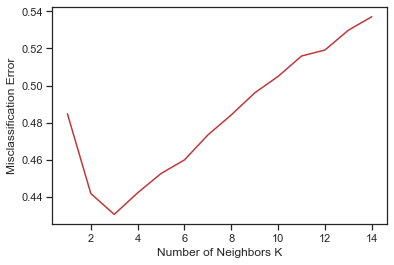

In [374]:
# plot misclassification error vs k
plt.plot(neighbors, Error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### Comparing the Decision Tree model and the KNN Regressor model and R2 is similar in both the models (around 0.75). 
#### Decision Tree model is giving a slightly better error of 15.99 when compared to KNN regressor of error 16.82